In [2]:
from upload_data import *
from utils import *
import pandas as pd
import time
%reload_ext autoreload
%autoreload 2

Things to answer for Louvain clustering:
- How do we choose N and T?
- How many clusters do we obtain?
- How does the number of clusters depends on ratio N/T?

Clustering with sign correlation matrix???



Loading the data

In [27]:
#load data
alldata = load_all(start_date = pd.to_datetime('2008-12-26'), end_date=pd.to_datetime('2008-12-31'), doSave = False)
#or 
#alldata = pd.read_parquet(r'data\clean\equities\events\US\2008-06-01-to-2008-12-31-events.parquet')

c:\Users\charl\EPFL\FinancialBigData\fin-big-data_project\upload_data.py:254: RuntimeWarning: invalid value encountered in scalar divide
  if not os.path.isdir(dirSave):
c:\Users\charl\EPFL\FinancialBigData\fin-big-data_project\upload_data.py:254: RuntimeWarning: invalid value encountered in scalar divide
  if not os.path.isdir(dirSave):
c:\Users\charl\EPFL\FinancialBigData\fin-big-data_project\upload_data.py:254: RuntimeWarning: invalid value encountered in scalar divide
  if not os.path.isdir(dirSave):
c:\Users\charl\EPFL\FinancialBigData\fin-big-data_project\upload_data.py:254: RuntimeWarning: invalid value encountered in scalar divide
  if not os.path.isdir(dirSave):
c:\Users\charl\EPFL\FinancialBigData\fin-big-data_project\upload_data.py:254: RuntimeWarning: invalid value encountered in scalar divide
  if not os.path.isdir(dirSave):
c:\Users\charl\EPFL\FinancialBigData\fin-big-data_project\upload_data.py:254: RuntimeWarning: invalid value encountered in scalar divide
  if not os.p

In [29]:
alldata.dropna(axis=0, inplace=True)

In [30]:
alldata

,trade_price,trade_volume,bid-price,bid-volume,ask-price,ask-volume,day,ticker,mid-price,vwap
xltime,,,,,,,,,,
2008-12-26 09:31:00-05:00,9.340,100.0,9.34,3.0,9.38,6.0,2008-12-26,AA.N,9.360,9.356765
2008-12-26 09:32:00-05:00,9.350,100.0,9.35,4.0,9.37,9.0,2008-12-26,AA.N,9.360,9.393778
2008-12-26 09:36:00-05:00,9.465,2700.0,9.45,3.0,9.47,1.0,2008-12-26,AA.N,9.460,9.461471
2008-12-26 09:40:00-05:00,9.490,100.0,9.49,2.0,9.50,6.0,2008-12-26,AA.N,9.495,9.473846
2008-12-26 09:55:00-05:00,9.450,500.0,9.44,67.0,9.45,1.0,2008-12-26,AA.N,9.445,9.448125
...,...,...,...,...,...,...,...,...,...,...
2008-12-31 15:49:00-05:00,18.540,200.0,18.53,2.0,18.55,2.0,2008-12-31,AXP.N,18.540,18.563636
2008-12-31 15:52:00-05:00,18.530,100.0,18.52,2.0,18.54,4.0,2008-12-31,AXP.N,18.530,18.526269
2008-12-31 15:53:00-05:00,18.540,600.0,18.53,8.0,18.54,12.0,2008-12-31,AXP.N,18.535,18.529667


In [26]:
#cutdata is df with only days after 2008-12-26
cutdata = alldata[alldata.index > pd.to_datetime('2008-12-26', utc='5')]
print(cutdata)

vwap = cutdata.resample('1min').apply(lambda x: (x.trade_price * x.trade_volume).sum() / x.trade_volume.sum())
cutdata['vwap'] = vwap

                           trade_price  trade_volume  bid-price  bid-volume   
xltime                                                                        
2008-12-26 09:30:55-05:00        9.365         200.0       9.32         3.0  \
2008-12-26 09:30:56-05:00        9.350         100.0       9.34         3.0   
2008-12-26 09:30:59-05:00        9.350         800.0       9.34         1.0   
2008-12-26 09:31:00-05:00        9.340         100.0       9.34         3.0   
2008-12-26 09:31:02-05:00        9.360         400.0       9.34         3.0   
...                                ...           ...        ...         ...   
2008-12-31 15:59:55-05:00       18.570        3500.0      18.57       275.0   
2008-12-31 15:59:56-05:00       18.590         700.0      18.57       136.0   
2008-12-31 15:59:57-05:00       18.580         100.0      18.58        27.0   
2008-12-31 15:59:58-05:00       18.570         200.0      18.57       121.0   
2008-12-31 15:59:59-05:00       18.570         100.0

C:\Users\charl\AppData\Local\Temp\ipykernel_12568\778672476.py:5: RuntimeWarning: invalid value encountered in scalar divide
  vwap = cutdata.resample('1min').apply(lambda x: (x.trade_price * x.trade_volume).sum() / x.trade_volume.sum())
C:\Users\charl\AppData\Local\Temp\ipykernel_12568\778672476.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cutdata['vwap'] = vwap


In [25]:
cutdata

,trade_price,trade_volume,bid-price,bid-volume,ask-price,ask-volume,day,ticker,mid-price,price_volume,vwap
xltime,,,,,,,,,,,
2008-12-26 09:30:55-05:00,9.365,200.0,9.32,3.0,9.35,3.0,2008-12-26,AA.N,9.335,1873.0,NaN
2008-12-26 09:30:56-05:00,9.350,100.0,9.34,3.0,9.36,3.0,2008-12-26,AA.N,9.350,935.0,NaN
2008-12-26 09:30:59-05:00,9.350,800.0,9.34,1.0,9.36,3.0,2008-12-26,AA.N,9.350,7480.0,NaN
2008-12-26 09:31:00-05:00,9.340,100.0,9.34,3.0,9.38,6.0,2008-12-26,AA.N,9.360,934.0,25.319129
2008-12-26 09:31:02-05:00,9.360,400.0,9.34,3.0,9.38,6.0,2008-12-26,AA.N,9.360,3744.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2008-12-31 15:59:55-05:00,18.570,3500.0,18.57,275.0,18.58,34.0,2008-12-31,AXP.N,18.575,64995.0,NaN
2008-12-31 15:59:56-05:00,18.590,700.0,18.57,136.0,18.59,994.0,2008-12-31,AXP.N,18.580,13013.0,NaN
2008-12-31 15:59:57-05:00,18.580,100.0,18.58,27.0,18.59,975.0,2008-12-31,AXP.N,18.585,1858.0,NaN


In [ ]:


# Step 4: Calculate VWAP
sums['vwap'] = sums['price_volume'] / sums['trade_volume']

# Resulting VWAP for each minute
vwap = sums['vwap']

In [14]:
#logreturns
alldata['logrets'] = alldata['trade_price'].apply(np.log).diff()


<Axes: xlabel='xltime'>

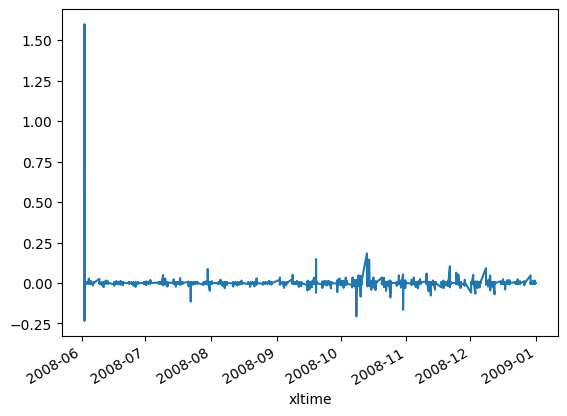

In [15]:
#plot logreturns
alldata['logrets'].plot()

## Marsili and Giada Clustering

Finance Motivated maximum likelihood clustering.

C is the correlation matrix


In [2]:
from marsili_giada_clustering import *

In [3]:
# Generate a synthetic 5x5 correlation matrix for demonstration
np.random.seed(42)  # For reproducibility
synthetic_data = np.random.rand(5, 100)  # Simulate 100 data points for 5 assets
C = np.corrcoef(synthetic_data)  # Create a correlation matrix from the synthetic data

print("Synthetic Correlation Matrix:\n", C)

Synthetic Correlation Matrix:
 [[ 1.         -0.0340325  -0.03765408 -0.21188195  0.12007498]
 [-0.0340325   1.         -0.14635362 -0.01178258 -0.08239331]
 [-0.03765408 -0.14635362  1.         -0.21481643 -0.03469451]
 [-0.21188195 -0.01178258 -0.21481643  1.          0.18752985]
 [ 0.12007498 -0.08239331 -0.03469451  0.18752985  1.        ]]


In [5]:
result = aggregate_clusters(C)
print("Final Clusters:\n", result['i_s'])  # Shows how assets are grouped into clusters
print("Likelihood Scores for Clusters:\n", result['Lc'])  # Shows the likelihood scores for each cluster

 HALF CLUSTER  Lc.new > max(Lc.old)
Lc.new <= max(Lc.old), exiting
Final Clusters:
 {0: [0, 2, 3], 1: [1, 4]}
Likelihood Scores for Clusters:
 {0: 0.08261134278982873, 1: 0.0068118050959881105}
